In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier

In [2]:
#read in provided data
provided_data = np.load('data/data_selected_1980_2010.npy').astype(np.float)
target = np.load('data/target_1980_2010.npy').astype(np.float)

In [3]:
#check the dimensions of provided data
provided_data.shape

(11300, 4)

In [4]:
#target has two columns and we only need one
target.shape

(11300, 2)

In [5]:
#make it so that there is only one column in target
target = target[:,1].reshape(11300,1)

In [6]:
target.shape

(11300, 1)

In [7]:
#let's split the date to train and test 
#since we have increased the number of samples required data spleat 
#will not do a good job
##########################################
#X_train = provided_data[:9497,:]
#X_test = provided_data[9497:,:]
#y_train = target[:9497,:]
#y_test = target[9497:,:]
##########################################
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(provided_data, target, test_size=0.20)

In [8]:
#there seems to be a problem with imbalanced target data 
#let's try to oversample under represented class with Synthetic Minority
# Oversampling technique (SMOTE)
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

/home/alpi/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
print X_train.shape
print y_train.shape

(17158, 4)
(17158,)


In [10]:
#check the results
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(17158, 4)
(2260, 4)
(17158,)
(2260, 1)


In [11]:
#now it is time to normalize the data (i.e. scale it)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# give scaler some more info to work with
normalizer.fit(X_train)

Normalizer(copy=True, norm='l2')

In [12]:
#now transform the data
X_train = normalizer.transform(X_train)
X_test = normalizer.transform(X_test)

In [13]:
#try to train the model
mlp = MLPClassifier()
mlp = mlp.fit(X_train, y_train)

In [14]:
#let's try our model
pred_probs = mlp.predict_proba(X_test)
predictions = mlp.predict(X_test)

In [23]:
#now is the time to evaluate how we did
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1620  536]
 [  35   69]]
             precision    recall  f1-score   support

        0.0       0.98      0.75      0.85      2156
        1.0       0.11      0.66      0.19       104

avg / total       0.94      0.75      0.82      2260



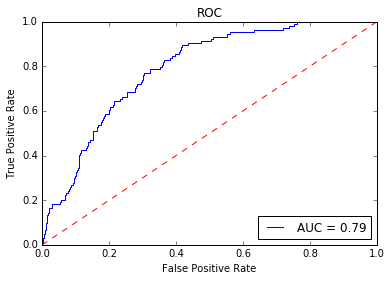

In [21]:
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plot
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
#print(fpr)
#print(tpr)
#print(threshold)
#print(roc_auc)

plot.title('ROC')
plot.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plot.legend(loc = 'lower right')
plot.plot([0, 1], [0, 1], 'r--')
plot.xlim([0, 1])
plot.ylim([0, 1])
plot.ylabel('True Positive Rate')
plot.xlabel('False Positive Rate')
plot.show()
plot.savefig('fig.png')